In [6]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('../datasets/police.csv')
# create a date time column.
ri['stop_datetime'] =  pd.to_datetime(ri.stop_date + ' ' + ri.stop_time)
# set the date time as an index.
ri.set_index('stop_datetime', inplace=True)

# Examine the head of the DataFrame
print(ri.head())



                    state   stop_date stop_time  county_name driver_gender  \
stop_datetime                                                                
2005-01-04 12:55:00    RI  2005-01-04     12:55          NaN             M   
2005-01-23 23:15:00    RI  2005-01-23     23:15          NaN             M   
2005-02-17 04:15:00    RI  2005-02-17     04:15          NaN             M   
2005-02-20 17:15:00    RI  2005-02-20     17:15          NaN             M   
2005-02-24 01:20:00    RI  2005-02-24     01:20          NaN             F   

                    driver_race                   violation_raw  violation  \
stop_datetime                                                                
2005-01-04 12:55:00       White  Equipment/Inspection Violation  Equipment   
2005-01-23 23:15:00       White                        Speeding   Speeding   
2005-02-17 04:15:00       White                        Speeding   Speeding   
2005-02-20 17:15:00       White                Call for Service

# Does time of day affect arrest rate?

### Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, calculate the arrest rate across all stops in the ri DataFrame. Then, you'll calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:

    0 = midnight
    12 = noon
    23 = 11 PM


In [7]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.03556777868937704
stop_datetime
0     0.051420
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038186
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047582
Name: is_arrested, dtype: float64


### Plotting the hourly arrest rate

Line plot from the hourly_arrest_rate object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help to spot some trends that may not have been obvious when examining the raw numbers!

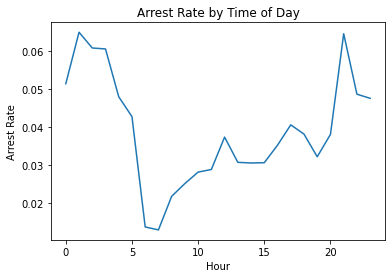

In [8]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

# Are drug-related stops on the rise?

### Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column drugs_related_stop indicates whether drugs were found during a given stop. Let's calculate the annual drug rate by resampling this column, and then use a line plot to visualize how the rate has changed over time.

stop_datetime
2005-12-31    0.006390
2006-12-31    0.006913
2007-12-31    0.007520
2008-12-31    0.006998
2009-12-31    0.009079
2010-12-31    0.009407
2011-12-31    0.009035
2012-12-31    0.009388
2013-12-31    0.012283
2014-12-31    0.013280
2015-12-31    0.011787
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


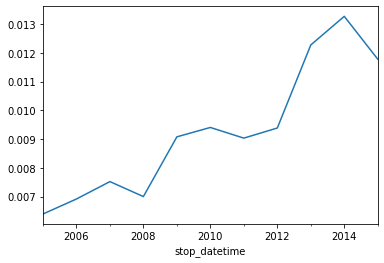

In [11]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample(rule='A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample(rule='A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

### Comparing drug and search rates

The rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then both rates increasing over time.

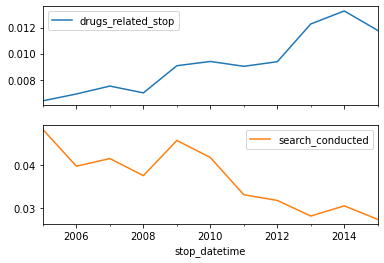

In [12]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample(rule='A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis=1)

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

# What violations are caught in each district?

### Tallying violations by district

The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

Lets' create a frequency table to determine how many violations of each type took place in each of the six zones. Then, filter the table to focus on the "K" zones.

In [13]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

### Plotting violations by district

Since we have a frequency table focused on the "K" zones, let's visualize the data to compare what violations are being caught in each zone.

First, let's create a bar plot, which is an appropriate plot type since comparing categorical data. Then we are going to stack it in order to get a slightly different look at the data. 

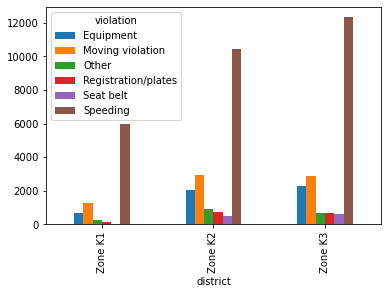

In [14]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

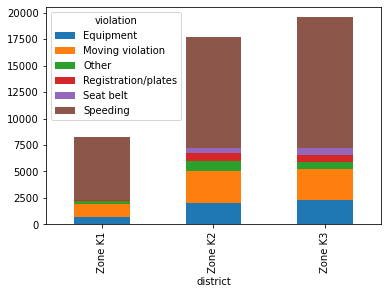

In [15]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

# How long might you be stopped for a violation?

### Converting stop durations to numbers

In the traffic stops dataset, the stop_duration column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. How can you make this data easier to analyze?

Let's convert the stop durations to integers. Because the precise durations are not available, we'll have to estimate the numbers using reasonable values:

    Convert '0-15 Min' to 8
    Convert '16-30 Min' to 23
    Convert '30+ Min' to 45


In [16]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' nan '30+ Min']
[ 8. 23. nan 45.]


### Plotting stop length

If you were stopped for a particular violation, how long might you expect to be detained?

Let's visualize the average length of time drivers are stopped for each type of violation. Rather than using the violation column let's use violation_raw since it contains more detailed descriptions of the violations.

violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


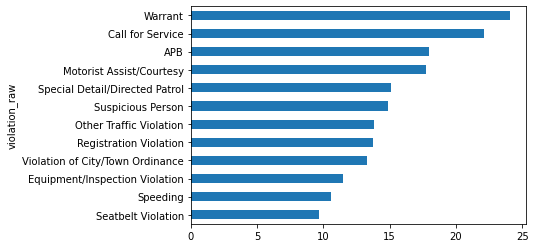

In [17]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()